<a href="https://colab.research.google.com/github/hetkothari/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Personal_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
data= pd.read_excel("/content/drive/MyDrive/Credit Card Default Prediction - Het Kothari/dataset.xlsx")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
data.shape

(30000, 25)

In [12]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
data = data.rename(columns={'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})
data.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT6':'PAY_AMT_MAR','PAY_AMT1':'PAY_AMT_AUG','PAY_AMT2':'PAY_AMT_JUL','PAY_AMT3':'PAY_AMT_JUN','PAY_AMT4':'PAY_AMT_MAY','PAY_AMT5':'PAY_AMT_APR'},inplace=True)

In [15]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_AMT_MAR', 'def_pay'],
      dtype='object')

In [16]:
len(data[data.duplicated()])

0

In [17]:
data = data.replace([-2],0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,PAY_AMT_MAR,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
data["pay"]=data["PAY_SEPT"]+data["PAY_AUG"]+data["PAY_JUL"]+data["PAY_JUN"]+data["PAY_MAY"]+data["PAY_APR"]
data["pay"].describe()

count    30000.000000
mean         0.533033
std          4.408759
min         -6.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         36.000000
Name: pay, dtype: float64

In [23]:
list1 = ["BILL_AMT_SEPT",	"BILL_AMT_AUG"	,"BILL_AMT_JUL"	,"BILL_AMT_JUN"	,"BILL_AMT_MAY"	,"BILL_AMT_APR","PAY_AMT_AUG",'PAY_AMT_JUL',	'PAY_AMT_JUN'	,'PAY_AMT_MAY'	,'PAY_AMT_APR'	,'PAY_AMT_MAR']

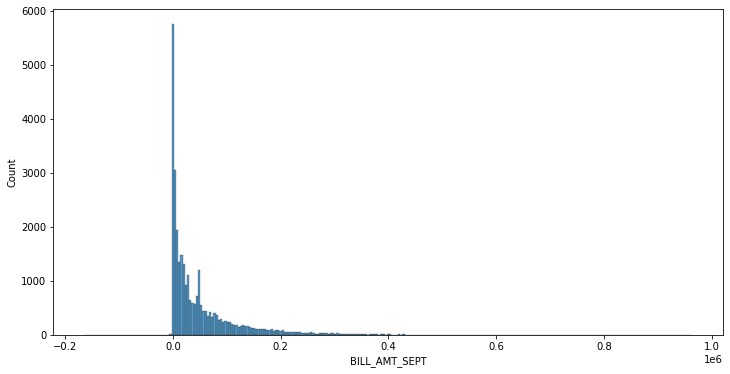

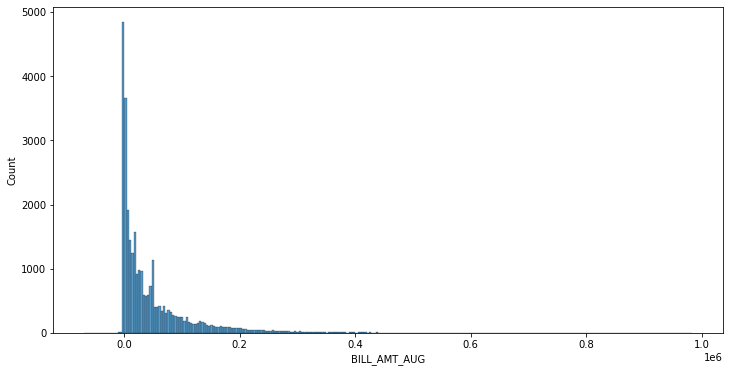

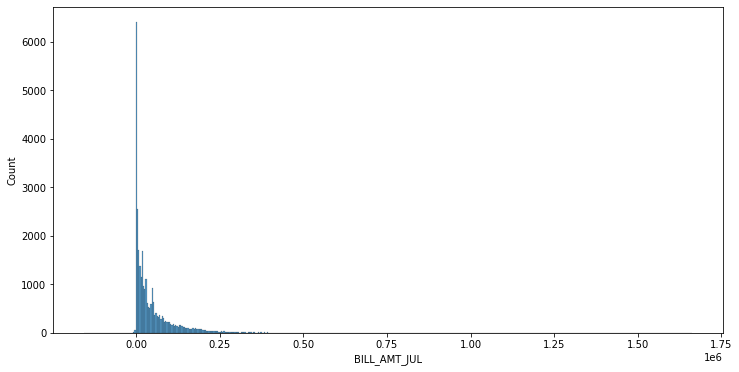

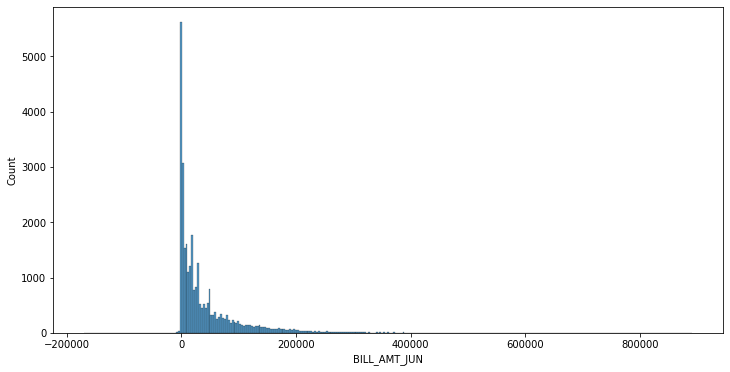

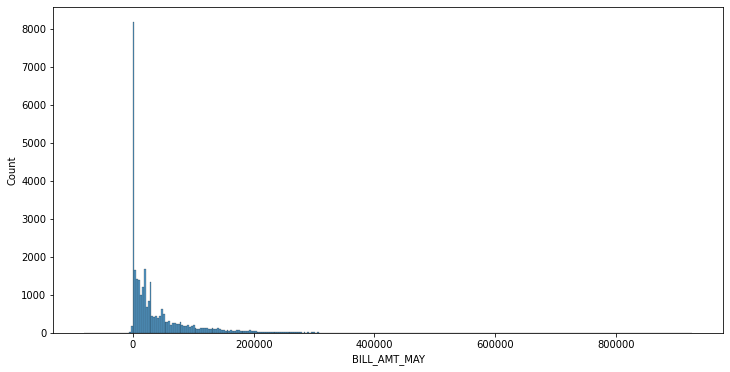

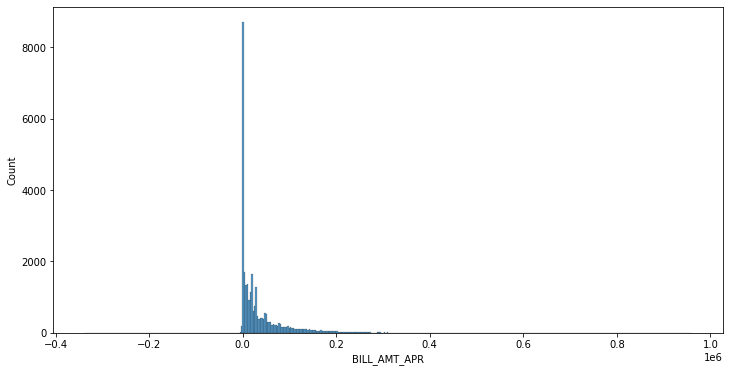

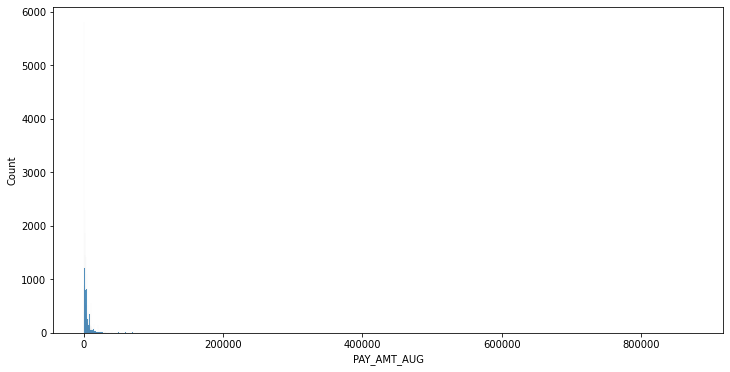

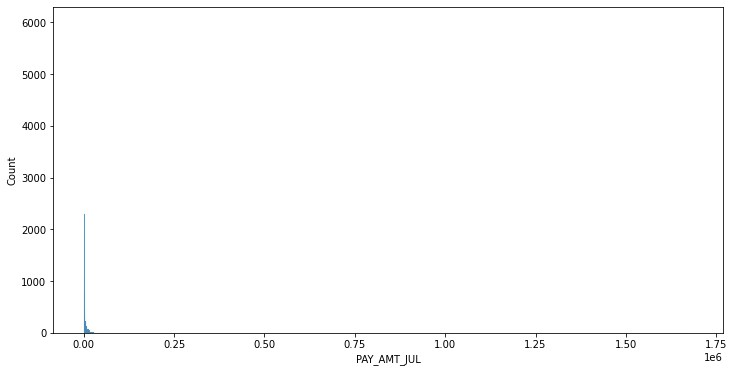

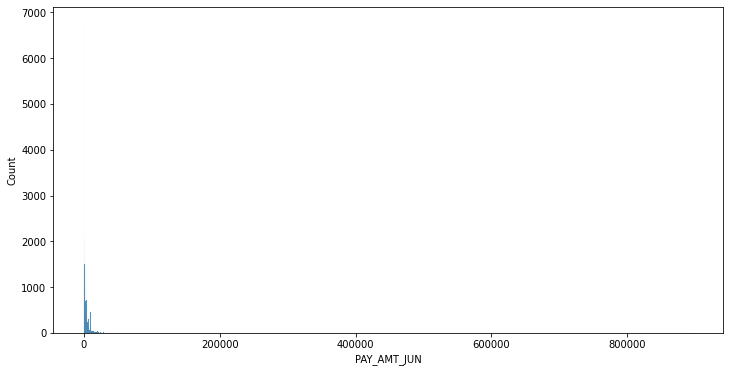

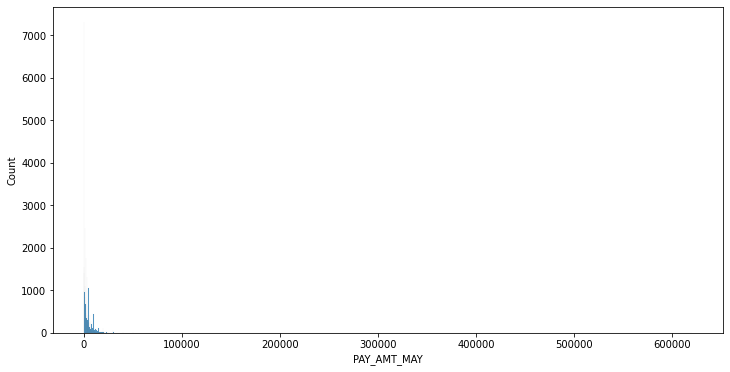

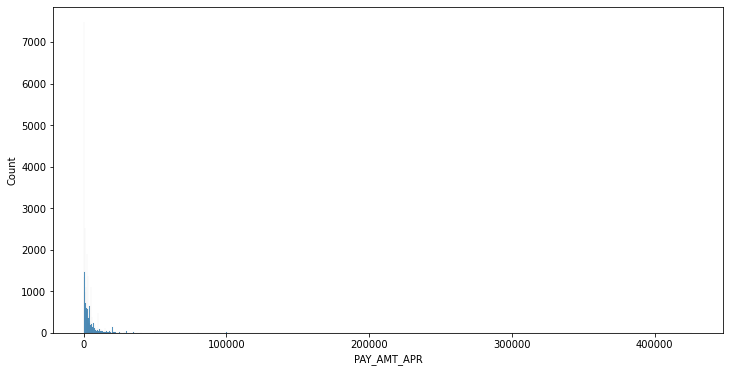

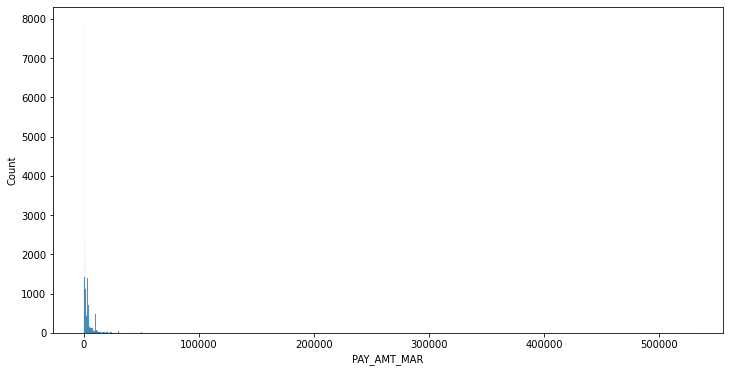

In [36]:
for column in list1[:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.histplot(data=data, x= column, ax= ax)
plt.show()

In [27]:
data["MARRIAGE"].value_counts(normalize= True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [29]:
data["EDUCATION"].value_counts(normalize= True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [30]:
data["def_pay"].value_counts(normalize= True)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

In [31]:
data["SEX"].value_counts(normalize= True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

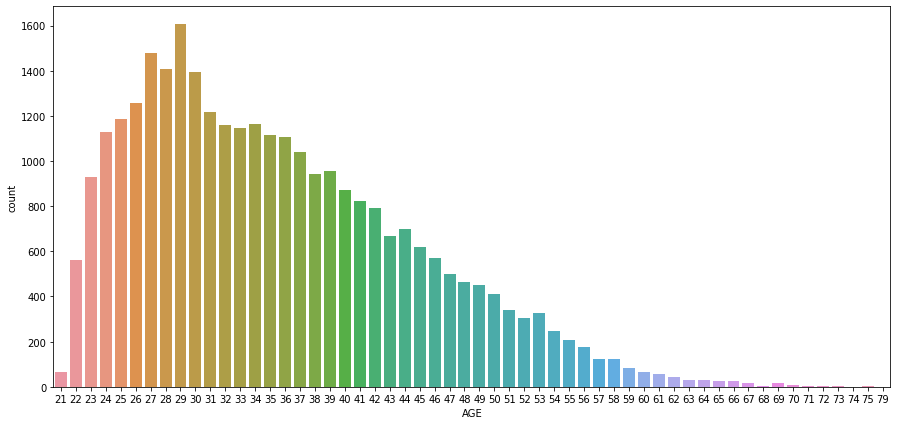

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = data)
plt.show()

In [33]:
data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

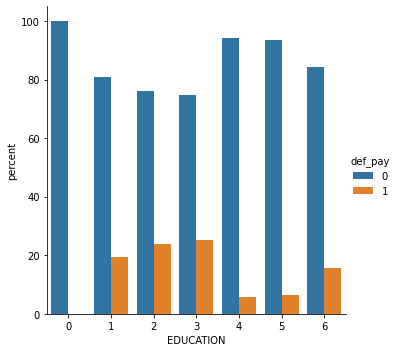

In [37]:
x,y = 'EDUCATION', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

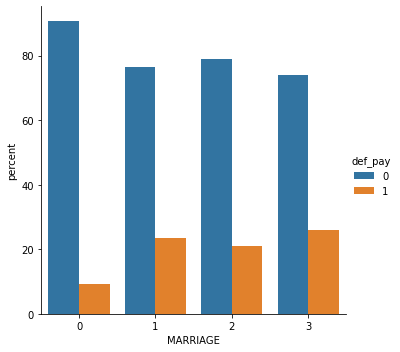

In [38]:
x,y = 'MARRIAGE', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


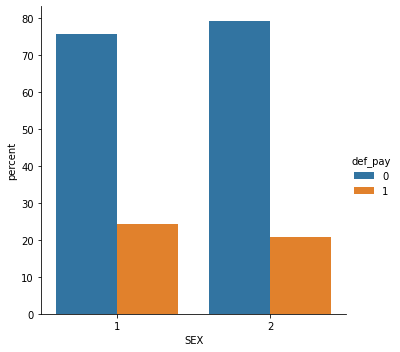

In [43]:
x,y = 'SEX', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

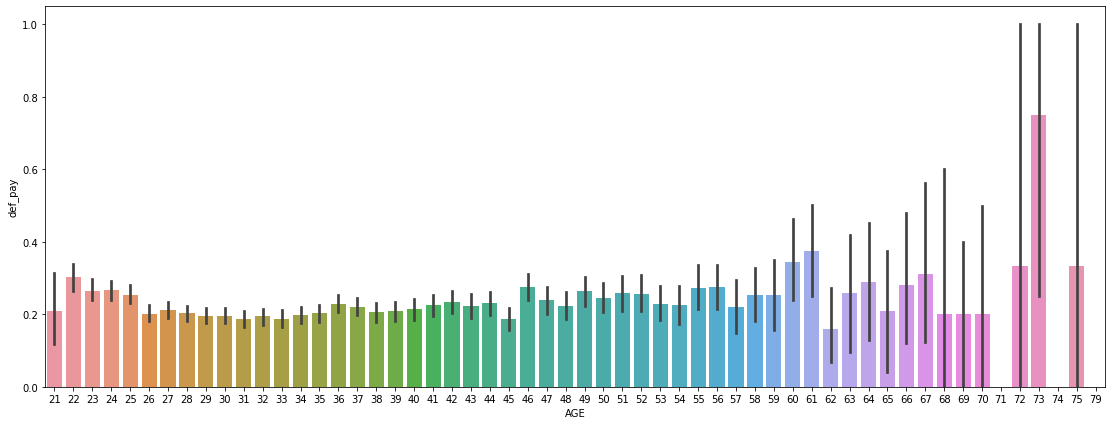

In [39]:
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'def_pay', data = data)

plt.show()

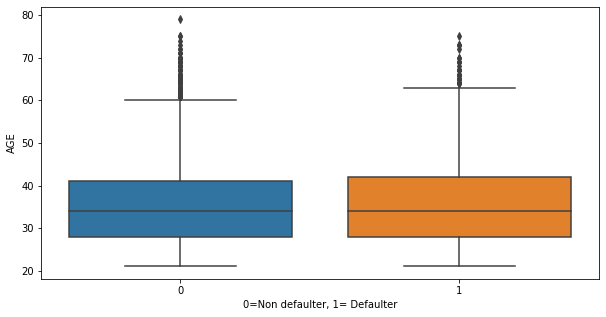

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',y='AGE',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

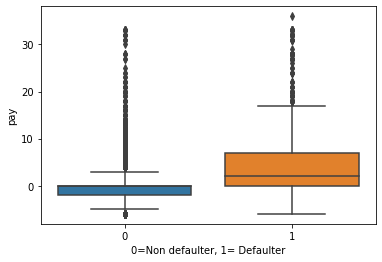

In [41]:
sns.boxplot(data=data, y="pay",x="def_pay")
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()